In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
class GridWorld:
    """Simple GridWorld environment for SARSA"""
    def __init__(self, size=5):
        self.size = size
        self.start = (0, 0)
        self.goal = (size-1, size-1)
        self.obstacles = [(1, 1), (2, 2), (3, 1)]
        self.state = self.start

    def reset(self):
        """Reset environment to start state"""
        self.state = self.start
        return self.state

    def step(self, action):
        """Execute action and return next_state, reward, done"""
        row, col = self.state

        # Actions: 0=up, 1=down, 2=left, 3=right
        if action == 0:  # up
            row = max(0, row - 1)
        elif action == 1:  # down
            row = min(self.size - 1, row + 1)
        elif action == 2:  # left
            col = max(0, col - 1)
        elif action == 3:  # right
            col = min(self.size - 1, col + 1)

        next_state = (row, col)

        # Check if hit obstacle
        if next_state in self.obstacles:
            next_state = self.state  # Stay in current position
            reward = -1
        elif next_state == self.goal:
            reward = 10
        else:
            reward = -0.1  # Small penalty for each step

        self.state = next_state
        done = (next_state == self.goal)

        return next_state, reward, done

    def get_possible_actions(self):
        """Return list of possible actions"""
        return [0, 1, 2, 3]  # up, down, left, right

In [3]:
class SARSAAgent:
    """SARSA Agent for action-value estimation and policy improvement"""
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=0.1):
      
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate

        # Q-table: Q(s, a) - action-value function
        self.Q = defaultdict(lambda: np.zeros(4))

        # Track metrics
        self.episode_rewards = []
        self.episode_lengths = []

In [4]:
def epsilon_greedy_policy(self, state):

    if np.random.random() < self.epsilon:
        # Explore: random action
        return np.random.choice(self.env.get_possible_actions())
    else:
        # Exploit: best action according to Q-values
        return np.argmax(self.Q[state])

# Add this method to SARSAAgent class
SARSAAgent.epsilon_greedy_policy = epsilon_greedy_policy

In [5]:
def sarsa_update(self, state, action, reward, next_state, next_action):
    
    # Current Q-value
    current_q = self.Q[state][action]

    # Next Q-value (using the NEXT action from policy)
    next_q = self.Q[next_state][next_action]

    # SARSA update
    td_target = reward + self.gamma * next_q
    td_error = td_target - current_q
    self.Q[state][action] = current_q + self.alpha * td_error

# Add this method to SARSAAgent class
SARSAAgent.sarsa_update = sarsa_update

In [6]:
def train(self, num_episodes=1000, verbose=True):
    
    for episode in range(num_episodes):
        # Reset environment
        state = self.env.reset()

        # Select initial action using policy
        action = self.epsilon_greedy_policy(state)

        episode_reward = 0
        steps = 0
        done = False

        while not done:
            # Take action, observe reward and next state
            next_state, reward, done = self.env.step(action)

            # Select next action using policy (this is key for SARSA!)
            next_action = self.epsilon_greedy_policy(next_state)

            # SARSA update
            self.sarsa_update(state, action, reward, next_state, next_action)

            # Move to next state and action
            state = next_state
            action = next_action

            episode_reward += reward
            steps += 1

            # Prevent infinite loops
            if steps > 200:
                break

        # Track metrics
        self.episode_rewards.append(episode_reward)
        self.episode_lengths.append(steps)

        # Decay epsilon (exploration rate)
        self.epsilon = max(0.01, self.epsilon * 0.995)

        # Print progress
        if verbose and (episode + 1) % 100 == 0:
            avg_reward = np.mean(self.episode_rewards[-100:])
            avg_length = np.mean(self.episode_lengths[-100:])
            print(f"Episode {episode + 1}/{num_episodes} - "
                  f"Avg Reward: {avg_reward:.2f}, "
                  f"Avg Length: {avg_length:.2f}, "
                  f"Epsilon: {self.epsilon:.3f}")

# Add this method to SARSAAgent class
SARSAAgent.train = train

In [7]:
def get_policy(self):
    """Extract learned policy from Q-values"""
    policy = {}
    for state in self.Q.keys():
        policy[state] = np.argmax(self.Q[state])
    return policy

# Add this method to SARSAAgent class
SARSAAgent.get_policy = get_policy

In [8]:
def visualize_policy(self):
    """Visualize learned policy on grid"""
    policy = self.get_policy()

    # Arrow symbols for actions
    arrows = {0: '↑', 1: '↓', 2: '←', 3: '→'}

    print("\nLearned Policy:")
    print("-" * (self.env.size * 4))

    for i in range(self.env.size):
        row_str = ""
        for j in range(self.env.size):
            state = (i, j)
            if state == self.env.goal:
                row_str += " G "
            elif state in self.env.obstacles:
                row_str += " X "
            elif state in policy:
                row_str += f" {arrows[policy[state]]} "
            else:
                row_str += " · "
        print(row_str)

    print("-" * (self.env.size * 4))
    print("G = Goal, X = Obstacle")

# Add this method to SARSAAgent class
SARSAAgent.visualize_policy = visualize_policy

In [9]:
def plot_training_progress(self):
    """Plot training metrics"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Plot episode rewards
    ax1.plot(self.episode_rewards, alpha=0.3, label='Raw')

    # Moving average
    window = 50
    if len(self.episode_rewards) >= window:
        moving_avg = np.convolve(self.episode_rewards,
                                np.ones(window)/window,
                                mode='valid')
        ax1.plot(range(window-1, len(self.episode_rewards)),
                moving_avg,
                label=f'{window}-Episode Moving Avg',
                linewidth=2)

    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Total Reward')
    ax1.set_title('SARSA: Episode Rewards')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot episode lengths
    ax2.plot(self.episode_lengths, alpha=0.3, label='Raw')

    if len(self.episode_lengths) >= window:
        moving_avg = np.convolve(self.episode_lengths,
                                np.ones(window)/window,
                                mode='valid')
        ax2.plot(range(window-1, len(self.episode_lengths)),
                moving_avg,
                label=f'{window}-Episode Moving Avg',
                linewidth=2)

    ax2.set_xlabel('Episode')
    ax2.set_ylabel('Steps to Goal')
    ax2.set_title('SARSA: Episode Lengths')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Add this method to SARSAAgent class
SARSAAgent.plot_training_progress = plot_training_progress

In [10]:
print("=" * 60)
print("SARSA Algorithm - Action-Value Estimation & Policy Improvement")
print("=" * 60)

# Create environment
env = GridWorld(size=5)

# Create SARSA agent
agent = SARSAAgent(
    env=env,
    alpha=0.1,      # Learning rate
    gamma=0.99,     # Discount factor
    epsilon=0.3     # Initial exploration rate
)

print("\nTraining SARSA agent...")
print("-" * 60)

SARSA Algorithm - Action-Value Estimation & Policy Improvement

Training SARSA agent...
------------------------------------------------------------


In [11]:
# Train agent
agent.train(num_episodes=1000, verbose=True)

Episode 100/1000 - Avg Reward: 7.78, Avg Length: 17.03, Epsilon: 0.182
Episode 200/1000 - Avg Reward: 9.07, Avg Length: 9.30, Epsilon: 0.110
Episode 300/1000 - Avg Reward: 9.15, Avg Length: 8.81, Epsilon: 0.067
Episode 400/1000 - Avg Reward: 9.23, Avg Length: 8.48, Epsilon: 0.040
Episode 500/1000 - Avg Reward: 9.28, Avg Length: 8.19, Epsilon: 0.024
Episode 600/1000 - Avg Reward: 9.27, Avg Length: 8.16, Epsilon: 0.015
Episode 700/1000 - Avg Reward: 9.29, Avg Length: 8.12, Epsilon: 0.010
Episode 800/1000 - Avg Reward: 9.29, Avg Length: 8.06, Epsilon: 0.010
Episode 900/1000 - Avg Reward: 9.29, Avg Length: 8.11, Epsilon: 0.010
Episode 1000/1000 - Avg Reward: 9.28, Avg Length: 8.07, Epsilon: 0.010


In [12]:
# Visualize learned policy
agent.visualize_policy()


Learned Policy:
--------------------
 →  →  →  ↓  ↓ 
 ↑  X  →  ↓  ↓ 
 ↓  ←  X  →  ↓ 
 ↓  X  →  ↓  ↓ 
 →  →  →  →  G 
--------------------
G = Goal, X = Obstacle


In [13]:
# Show Q-values for start state
start_state = env.start
print(f"\nQ-values at start state {start_state}:")
print(f"  Up:    {agent.Q[start_state][0]:.3f}")
print(f"  Down:  {agent.Q[start_state][1]:.3f}")
print(f"  Left:  {agent.Q[start_state][2]:.3f}")
print(f"  Right: {agent.Q[start_state][3]:.3f}")


Q-values at start state (0, 0):
  Up:    4.610
  Down:  -0.058
  Left:  4.181
  Right: 8.433



Generating training progress plots...


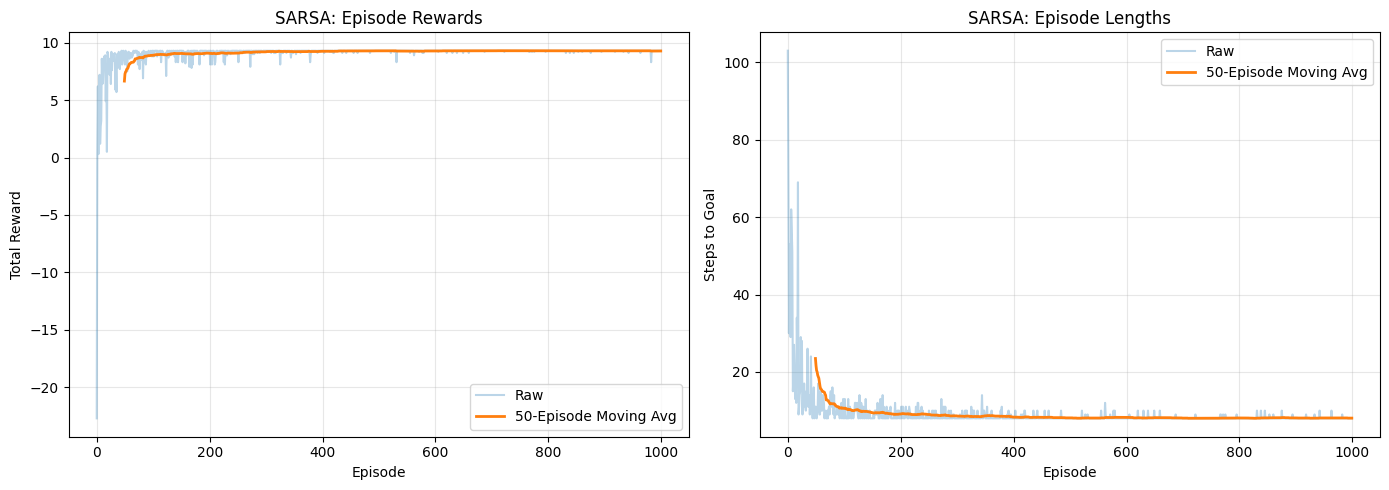


SARSA training complete!


In [14]:
# Plot training progress
print("\nGenerating training progress plots...")
agent.plot_training_progress()

print("\n" + "=" * 60)
print("SARSA training complete!")
print("=" * 60)


Comparing SARSA vs Q-Learning

Training SARSA...
Training Q-Learning...


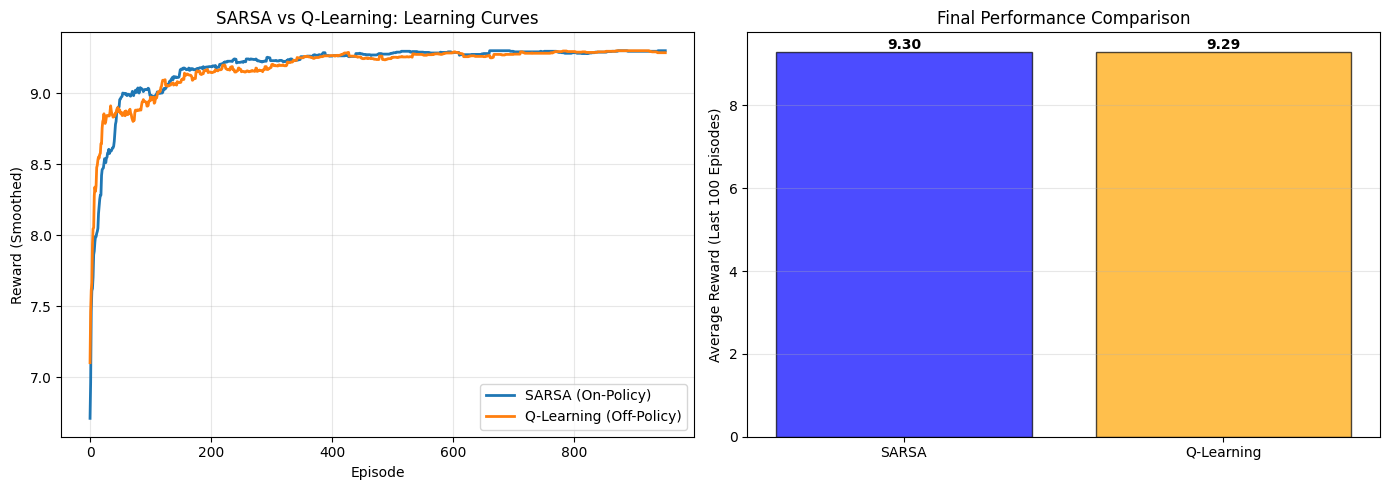


Final Performance:
  SARSA:      9.30
  Q-Learning: 9.29


In [15]:
# Import Q-Learning for comparison
class QLearningAgent:
    """Q-Learning Agent for comparison"""
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.Q = defaultdict(lambda: np.zeros(4))
        self.episode_rewards = []
    
    def epsilon_greedy_policy(self, state):
        if np.random.random() < self.epsilon:
            return np.random.choice(self.env.get_possible_actions())
        else:
            return np.argmax(self.Q[state])
    
    def train(self, num_episodes=1000, verbose=False):
        for episode in range(num_episodes):
            state = self.env.reset()
            episode_reward = 0
            steps = 0
            done = False
            
            while not done:
                action = self.epsilon_greedy_policy(state)
                next_state, reward, done = self.env.step(action)
                
                # Q-Learning update (off-policy: use max)
                current_q = self.Q[state][action]
                max_next_q = np.max(self.Q[next_state])
                td_target = reward + self.gamma * max_next_q
                self.Q[state][action] = current_q + self.alpha * (td_target - current_q)
                
                state = next_state
                episode_reward += reward
                steps += 1
                
                if steps > 200:
                    break
            
            self.episode_rewards.append(episode_reward)
            self.epsilon = max(0.01, self.epsilon * 0.995)

# Compare SARSA and Q-Learning
print("\n" + "=" * 60)
print("Comparing SARSA vs Q-Learning")
print("=" * 60)

# Train SARSA
print("\nTraining SARSA...")
env_sarsa = GridWorld(size=5)
sarsa_agent = SARSAAgent(env_sarsa, alpha=0.1, gamma=0.99, epsilon=0.3)
sarsa_agent.train(num_episodes=1000, verbose=False)

# Train Q-Learning
print("Training Q-Learning...")
env_qlearn = GridWorld(size=5)
qlearn_agent = QLearningAgent(env_qlearn, alpha=0.1, gamma=0.99, epsilon=0.3)
qlearn_agent.train(num_episodes=1000, verbose=False)

# Plot comparison
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
window = 50
sarsa_smooth = np.convolve(sarsa_agent.episode_rewards, np.ones(window)/window, mode='valid')
qlearn_smooth = np.convolve(qlearn_agent.episode_rewards, np.ones(window)/window, mode='valid')

plt.plot(sarsa_smooth, label='SARSA (On-Policy)', linewidth=2)
plt.plot(qlearn_smooth, label='Q-Learning (Off-Policy)', linewidth=2)
plt.xlabel('Episode')
plt.ylabel('Reward (Smoothed)')
plt.title('SARSA vs Q-Learning: Learning Curves')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
final_sarsa = np.mean(sarsa_agent.episode_rewards[-100:])
final_qlearn = np.mean(qlearn_agent.episode_rewards[-100:])

plt.bar(['SARSA', 'Q-Learning'], [final_sarsa, final_qlearn], 
        alpha=0.7, edgecolor='black', color=['blue', 'orange'])
plt.ylabel('Average Reward (Last 100 Episodes)')
plt.title('Final Performance Comparison')
plt.grid(True, alpha=0.3, axis='y')

for i, (name, val) in enumerate([('SARSA', final_sarsa), ('Q-Learning', final_qlearn)]):
    plt.text(i, val, f'{val:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nFinal Performance:")
print(f"  SARSA:      {final_sarsa:.2f}")
print(f"  Q-Learning: {final_qlearn:.2f}")


Epsilon Sensitivity Analysis

Training with ε=0.05...
  Final avg reward: 9.28

Training with ε=0.1...
  Final avg reward: 9.28

Training with ε=0.2...
  Final avg reward: 9.26

Training with ε=0.3...
  Final avg reward: 9.30

Training with ε=0.5...
  Final avg reward: 9.28


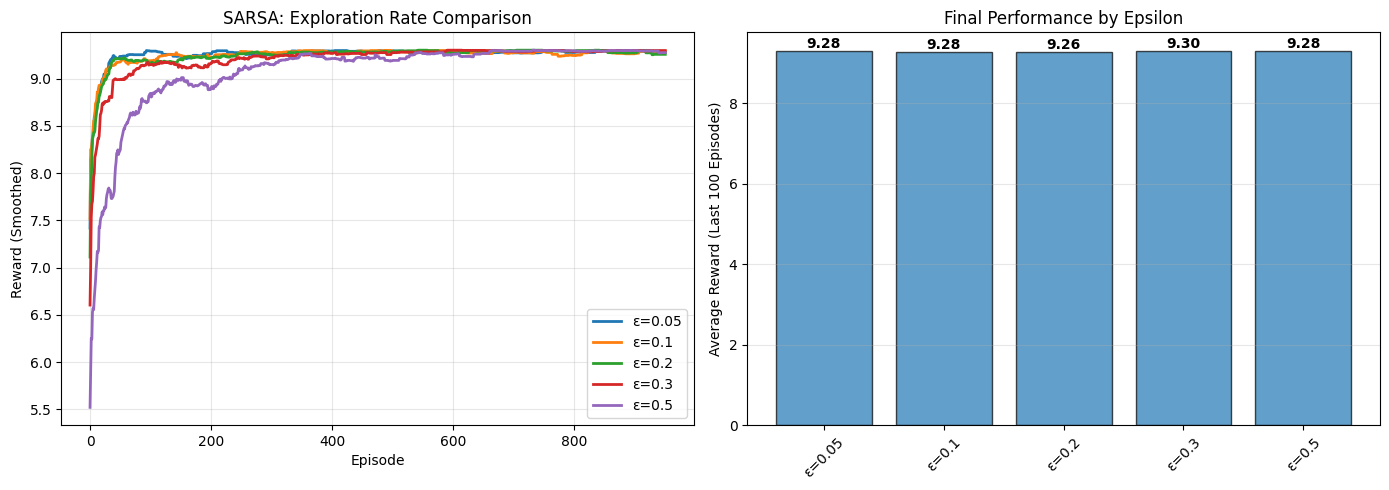

In [16]:
# Test different exploration rates
print("\n" + "=" * 60)
print("Epsilon Sensitivity Analysis")
print("=" * 60)

epsilons = [0.05, 0.1, 0.2, 0.3, 0.5]
results = {}

for eps in epsilons:
    print(f"\nTraining with ε={eps}...")
    env_test = GridWorld(size=5)
    agent_test = SARSAAgent(env_test, alpha=0.1, gamma=0.99, epsilon=eps)
    agent_test.train(num_episodes=1000, verbose=False)
    results[f'ε={eps}'] = agent_test.episode_rewards
    print(f"  Final avg reward: {np.mean(agent_test.episode_rewards[-100:]):.2f}")

# Plot comparison
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
for name, rewards in results.items():
    smoothed = np.convolve(rewards, np.ones(50)/50, mode='valid')
    plt.plot(smoothed, label=name, linewidth=2)

plt.xlabel('Episode')
plt.ylabel('Reward (Smoothed)')
plt.title('SARSA: Exploration Rate Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
final_perfs = [np.mean(rewards[-100:]) for rewards in results.values()]
plt.bar(results.keys(), final_perfs, alpha=0.7, edgecolor='black')
plt.ylabel('Average Reward (Last 100 Episodes)')
plt.title('Final Performance by Epsilon')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

for i, val in enumerate(final_perfs):
    plt.text(i, val, f'{val:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()